In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Data

In [2]:
df = pd.read_csv('population_backup/storage/experiment6/data_neat/topology_2_1.csv')
print(f"Size: {len(df)}")
df.head()

Size: 10002


,bias0,bias1,bias2,weight_xr,weight_xz,weight_xh,weight_hr,weight_hz,weight_hh,conn1,conn2,finished
0,-2.625525,1.849588,-0.488848,2.028905,0.196752,2.996232,-1.222533,-0.247173,-1.288960,3,-6.0,0.888889
1,-2.625525,1.781633,-0.488848,1.952870,0.409844,3.078329,-1.222533,2.021939,-1.423531,3,-6.0,1.000000
2,-2.625525,1.781633,-0.488848,2.154124,0.196752,3.000870,-1.222533,-0.360831,-0.891593,3,-6.0,0.944444
3,-2.625525,1.781633,-0.488848,2.028905,0.196752,3.078329,-1.234102,0.106325,-1.423531,3,-6.0,0.944444
4,-2.625525,1.849588,-0.488848,2.028905,0.196752,2.996232,-1.222533,-0.247173,-1.288960,3,-6.0,0.888889


In [3]:
# df2 = pd.read_csv('population_backup/storage/experiment6/data_neat/topology_1_1.csv')
# df = df.append(df2, ignore_index=True)
# print(f"Size: {len(df)}")
# df.head()

In [4]:
head = list(df.columns)[:-1]
# head = list(df_init.columns)

In [5]:
head

['bias0',
 'bias1',
 'bias2',
 'weight_xr',
 'weight_xz',
 'weight_xh',
 'weight_hr',
 'weight_hz',
 'weight_hh',
 'conn1',
 'conn2']

In [6]:
df.head()

,bias0,bias1,bias2,weight_xr,weight_xz,weight_xh,weight_hr,weight_hz,weight_hh,conn1,conn2,finished
0,-2.625525,1.849588,-0.488848,2.028905,0.196752,2.996232,-1.222533,-0.247173,-1.288960,3,-6.0,0.888889
1,-2.625525,1.781633,-0.488848,1.952870,0.409844,3.078329,-1.222533,2.021939,-1.423531,3,-6.0,1.000000
2,-2.625525,1.781633,-0.488848,2.154124,0.196752,3.000870,-1.222533,-0.360831,-0.891593,3,-6.0,0.944444
3,-2.625525,1.781633,-0.488848,2.028905,0.196752,3.078329,-1.234102,0.106325,-1.423531,3,-6.0,0.944444
4,-2.625525,1.849588,-0.488848,2.028905,0.196752,2.996232,-1.222533,-0.247173,-1.288960,3,-6.0,0.888889


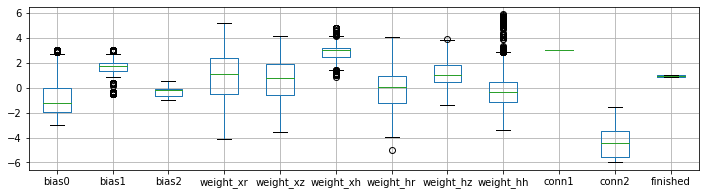

In [7]:
plt.figure(figsize=(12,3))
df.boxplot()
plt.show()
plt.close()

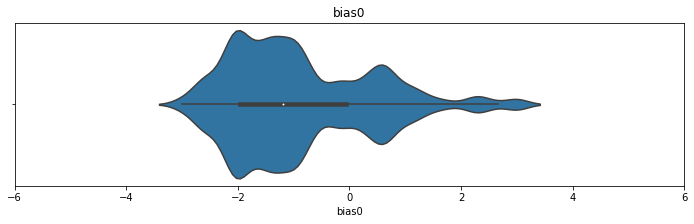

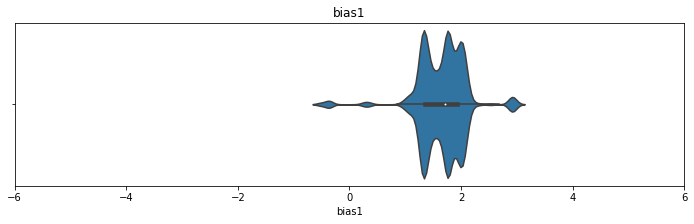

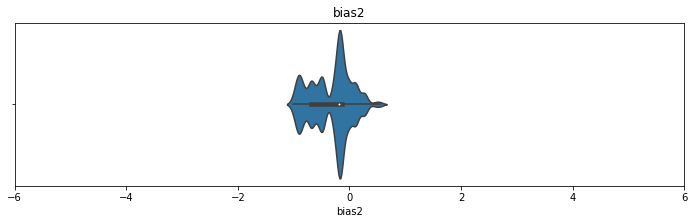

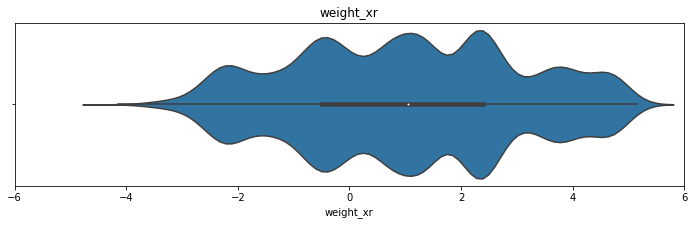

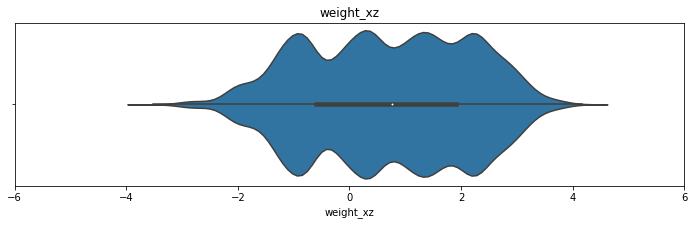

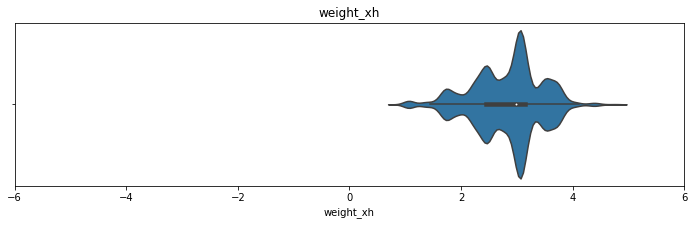

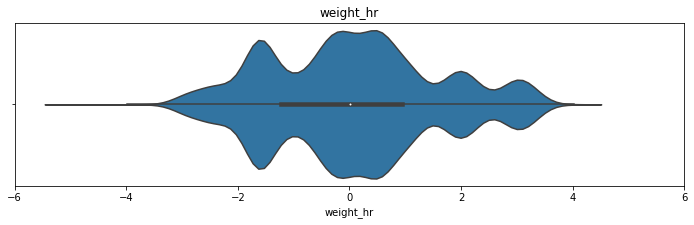

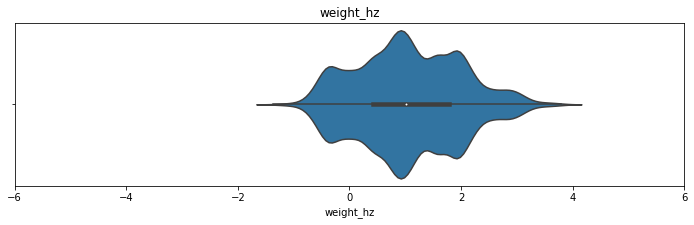

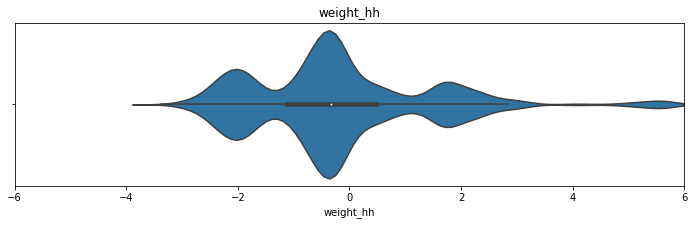

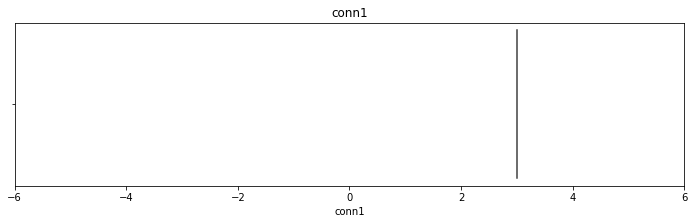

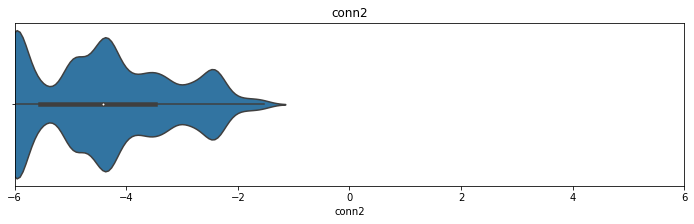

In [12]:
for h in head:
    plt.figure(figsize=(12,3))
    sns.violinplot(df[h])
    plt.title(h)
    plt.xlim(-6,6)
    plt.show()
    plt.close()

In [8]:
# df = df.loc[df['fitness'] > 0.5]
len(df)

10002

# PCA

In [9]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[head].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28250162 0.22780952 0.13699288]


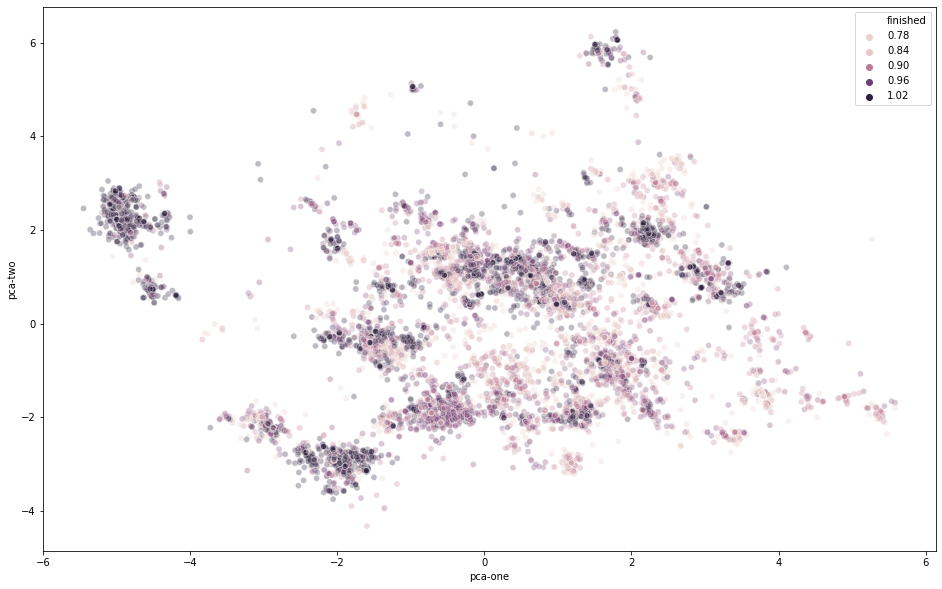

In [10]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="finished",
    data=df,
    alpha=0.3,
)

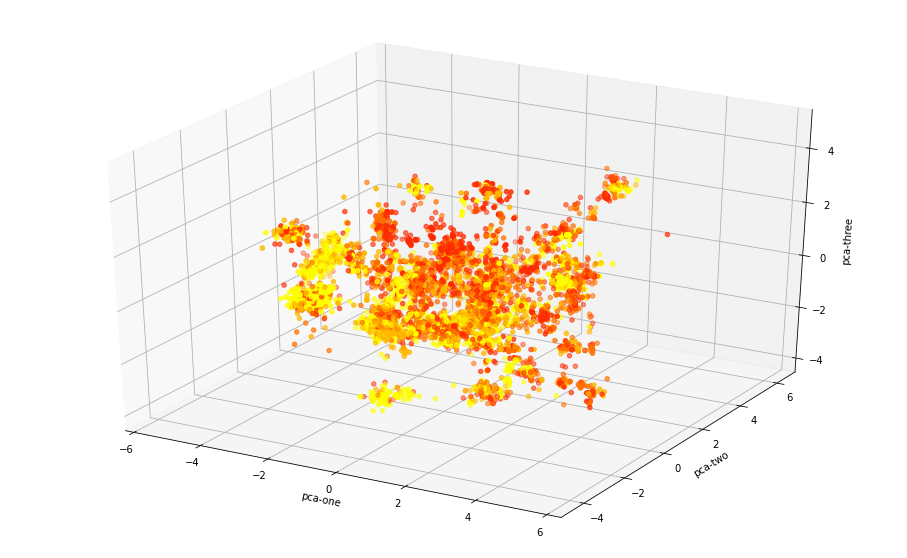

In [11]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["pca-one"], 
    ys=df["pca-two"], 
    zs=df["pca-three"], 
#     xs=df.loc[rndperm,:]["pca-one"], 
#     ys=df.loc[rndperm,:]["pca-two"], 
#     zs=df.loc[rndperm,:]["pca-three"], 
#     cmap='tab10',
#     c=[int(i) for i in df.loc[rndperm,:]["y"]], 
    c=[(1, 1-5*(1-min(i,1)), 0, min(i,1)) for i in df["finished"]], 
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

# t-SNE

In [12]:
df_values = df[head].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.28250162 0.22780952 0.13699288]


In [13]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10002 samples in 0.027s...
[t-SNE] Computed neighbors for 10002 samples in 0.602s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10002
[t-SNE] Computed conditional probabilities for sample 2000 / 10002
[t-SNE] Computed conditional probabilities for sample 3000 / 10002
[t-SNE] Computed conditional probabilities for sample 4000 / 10002
[t-SNE] Computed conditional probabilities for sample 5000 / 10002
[t-SNE] Computed conditional probabilities for sample 6000 / 10002
[t-SNE] Computed conditional probabilities for sample 7000 / 10002
[t-SNE] Computed conditional probabilities for sample 8000 / 10002
[t-SNE] Computed conditional probabilities for sample 9000 / 10002
[t-SNE] Computed conditional probabilities for sample 10000 / 10002
[t-SNE] Computed conditional probabilities for sample 10002 / 10002
[t-SNE] Mean sigma: 0.195965
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.960915
[t-SNE] KL

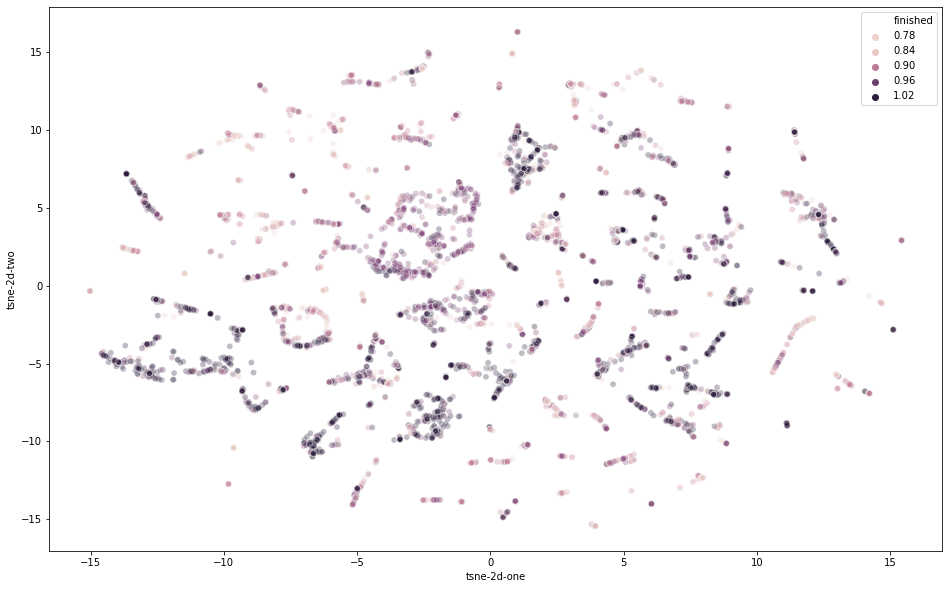

In [14]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="finished",
    data=df,
    alpha=0.3
)

In [15]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10002 samples in 0.026s...
[t-SNE] Computed neighbors for 10002 samples in 0.606s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10002
[t-SNE] Computed conditional probabilities for sample 2000 / 10002
[t-SNE] Computed conditional probabilities for sample 3000 / 10002
[t-SNE] Computed conditional probabilities for sample 4000 / 10002
[t-SNE] Computed conditional probabilities for sample 5000 / 10002
[t-SNE] Computed conditional probabilities for sample 6000 / 10002
[t-SNE] Computed conditional probabilities for sample 7000 / 10002
[t-SNE] Computed conditional probabilities for sample 8000 / 10002
[t-SNE] Computed conditional probabilities for sample 9000 / 10002
[t-SNE] Computed conditional probabilities for sample 10000 / 10002
[t-SNE] Computed conditional probabilities for sample 10002 / 10002
[t-SNE] Mean sigma: 0.195965
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.055840
[t-SNE] KL

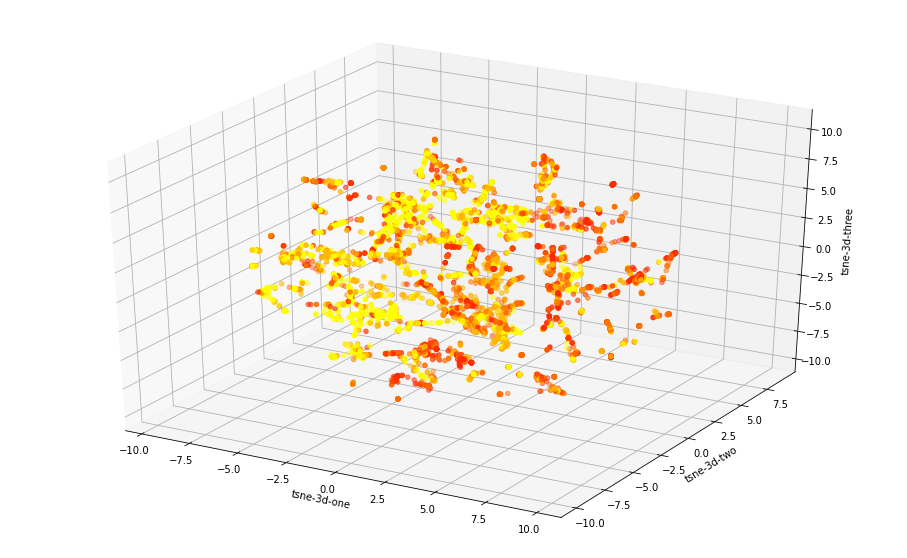

In [16]:
df['tsne-3d-one'] = tsne_results[:,0]
df['tsne-3d-two'] = tsne_results[:,1]
df['tsne-3d-three'] = tsne_results[:,2]
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df["tsne-3d-one"], 
    ys=df["tsne-3d-two"], 
    zs=df["tsne-3d-three"], 
#     xs=df.loc[rndperm,:]["pca-one"], 
#     ys=df.loc[rndperm,:]["pca-two"], 
#     zs=df.loc[rndperm,:]["pca-three"], 
#     cmap='tab10',
#     c=[int(i) for i in df.loc[rndperm,:]["y"]], 
    c=[(1, 1-5*(1-min(i,1)), 0, min(i,1)) for i in df["finished"]], 
)
ax.set_xlabel('tsne-3d-one')
ax.set_ylabel('tsne-3d-two')
ax.set_zlabel('tsne-3d-three')
plt.show()